In [119]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

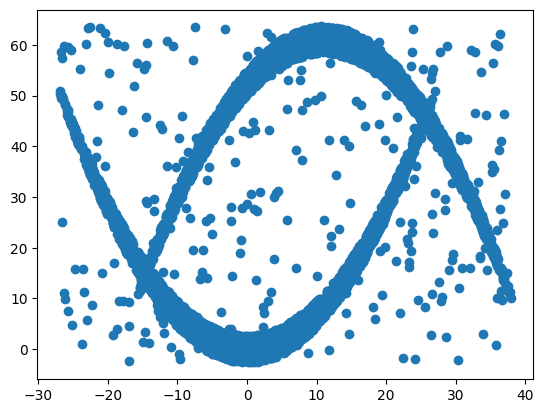

In [120]:
f = open("hs.dat")
d = []
for i in f:
  d.append([float(x) for x in i.split()])
d = np.array(d)
plt.scatter(d[:, 0], d[:, 1])
plt.show()
x0 = d[:, 0]
x1 = d[:, 1]


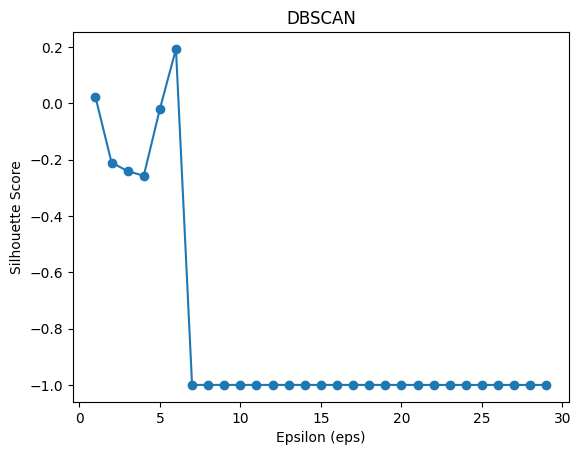

Оптимальный epsilon: 6
Лучший Silhouette Score: 0.19301287854169147
Количество найденных кластеров: 2


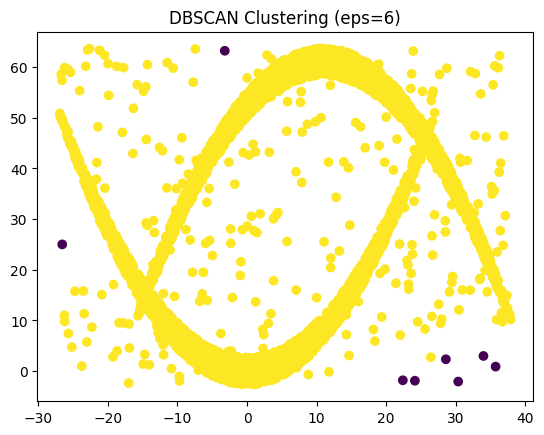

In [121]:
#1. DBSCAN + Silhouette Score
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

silhouette_scores = []
best_score = -1
best_eps = -1
best_labels = None

for eps in range(1, 30):
  clf = DBSCAN(eps=eps)
  labels = clf.fit_predict(d)
  if len(np.unique(labels)) > 1:
    score = silhouette_score(d, labels)
    silhouette_scores.append(score)
    if score > best_score:
      best_score = score
      best_eps = eps
      best_labels = labels
  else:
    silhouette_scores.append(-1)
    
plt.plot(range(1, 30), silhouette_scores, marker='o', linestyle='-')
plt.title("DBSCAN")
plt.xlabel("Epsilon (eps)")
plt.ylabel("Silhouette Score")
plt.show()

print(f"Оптимальный epsilon: {best_eps}")
print(f"Лучший Silhouette Score: {best_score}")
print(f"Количество найденных кластеров: {len(np.unique(best_labels))}")

plt.title(f"DBSCAN Clustering (eps={best_eps})")
plt.scatter(x0, x1, c=best_labels)
plt.show()

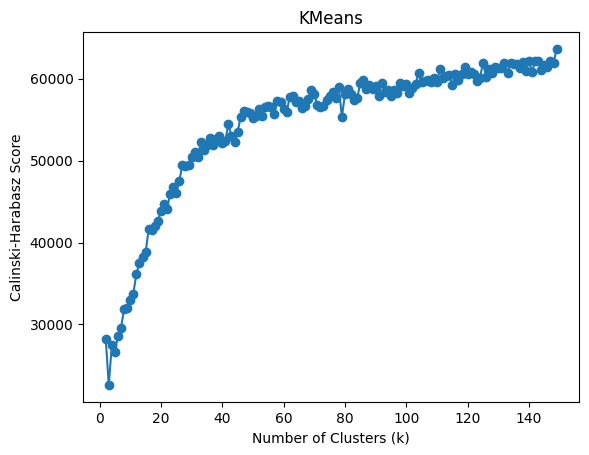

Оптимальное кол-во кластеров: 149
Лучший Calinski-Harabasz Score: 63630.97512626397


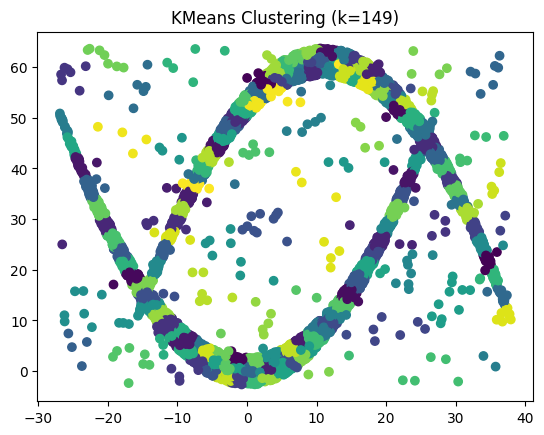

In [122]:
#2. KMeans + Calinski-Harabasz Score
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

ch_scores = []
best_score = -1
best_n_clusters = -1
best_labels = None

for n_clusters in range(2, 150):
  clf = KMeans(n_clusters=n_clusters)
  labels = clf.fit_predict(d)
  score = calinski_harabasz_score(d, labels)
  ch_scores.append(score)
  if score > best_score:
    best_score = score
    best_n_clusters = n_clusters
    best_labels = labels

plt.plot(range(2, 150), ch_scores, marker='o', linestyle='-')
plt.title("KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.show()

print(f"Оптимальное кол-во кластеров: {best_n_clusters}")
print(f"Лучший Calinski-Harabasz Score: {best_score}")
plt.title(f"KMeans Clustering (k={best_n_clusters})")
plt.scatter(x0, x1, c=best_labels)
plt.show()

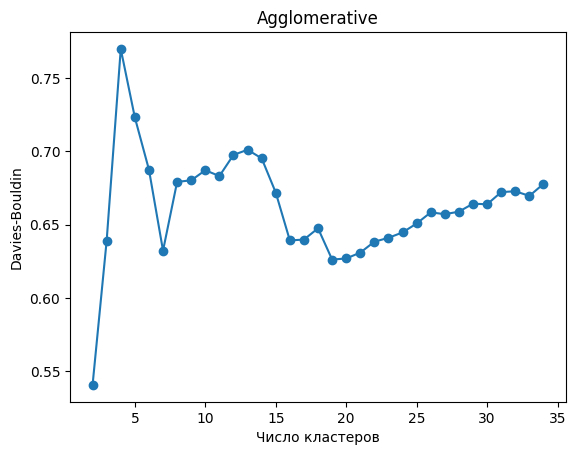

Оптимальное число кластеров: 2
Лучший Davies-Bouldin: 0.5408144292222365


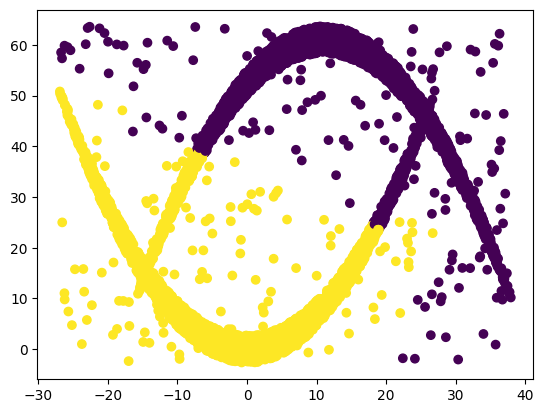

In [123]:
#3. AgglomerativeClustering + Davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

db_scores = []
best_score = float('inf')
best_n = None
best_labels = None

for n in range(2, 35):
    clf = AgglomerativeClustering(n_clusters=n)
    labels = clf.fit_predict(d)
    score = davies_bouldin_score(d, labels)
    db_scores.append(score)
    if score < best_score:
        best_score = score
        best_n = n
        best_labels = labels

plt.plot(range(2, 35), db_scores, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Davies-Bouldin')
plt.title('Agglomerative')
plt.show()

print(f'Оптимальное число кластеров: {best_n}')
print(f'Лучший Davies-Bouldin: {best_score}')
plt.scatter(x0, x1, c=best_labels)
plt.show()

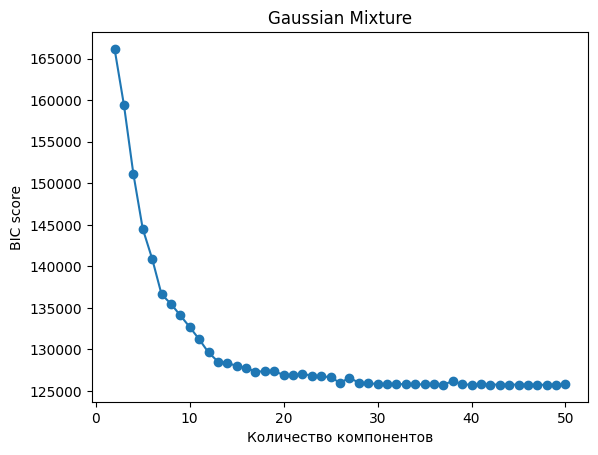

Оптимальное кол-во компонентов: 47
Лучший BIC Score: 125711.85731232962


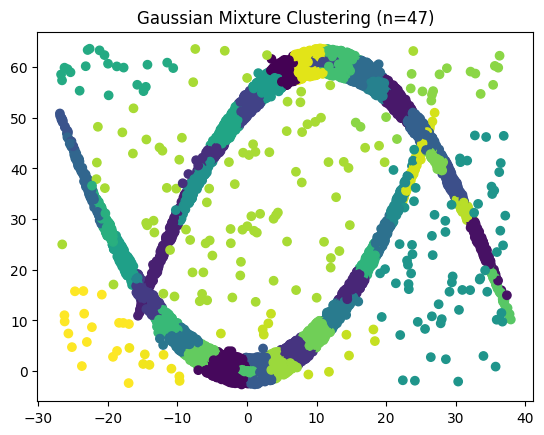

In [ ]:
# 4. Gaussian Mixture + BIC
from sklearn.mixture import GaussianMixture
bic_scores = []
best_score = float('inf')
best_n_components = -1
best_labels = None

for n_components in range(2, 51):
  clf = GaussianMixture(n_components = n_components)
  c = clf.fit_predict(d)
  score = clf.bic(d)
  bic_scores.append(score)
  if score < best_score:
    best_score = score
    best_n_components = n_components
    best_labels = clf.predict(d)

plt.plot(range(2, 51), bic_scores, marker = 'o', linestyle = '-')
plt.title("Gaussian Mixture")
plt.xlabel("Количество компонентов")
plt.ylabel("BIC score")
plt.show()

print(f"Оптимальное кол-во компонентов: {best_n_components}")
print(f"Лучший BIC Score: {best_score}")

plt.title(f"Gaussian Mixture Clustering (n={best_n_components})")
plt.scatter(x0, x1, c=best_labels)
plt.show()

Оптимальный eps: 8.0
Лучший Silhouette Score: 0.25555407526202717


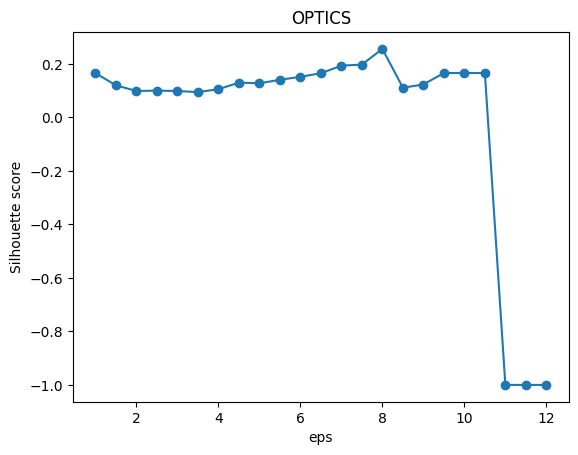

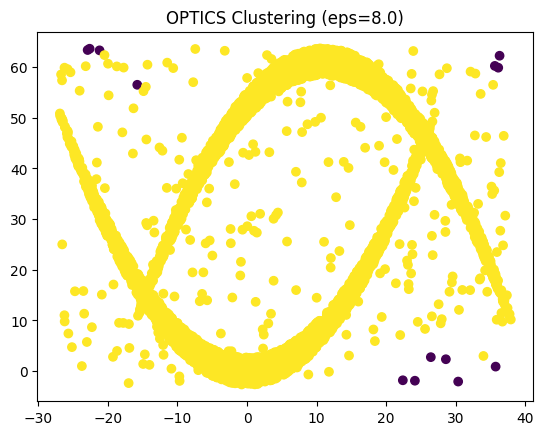

In [125]:
# 6. OPTICS + silhoeuette score (manhattan)
from sklearn.cluster import OPTICS

eps_values = np.arange(1.0, 12.5, 0.5)
silhouette_scores = [] 
best_score = -1
best_eps = -1
best_labels = None

for eps in eps_values:
    clf = OPTICS(min_samples=20, cluster_method='dbscan', eps=eps)
    labels = clf.fit_predict(d)
    if len(np.unique(labels)) > 1:
        score = silhouette_score(d, labels, metric = 'manhattan')
        silhouette_scores.append(score)
        if score > best_score:
            best_score = score
            best_eps = eps
            best_labels = labels
    else:
        silhouette_scores.append(-1)

print(f"Оптимальный eps: {best_eps}")
print(f"Лучший Silhouette Score: {best_score}")

plt.plot(eps_values, silhouette_scores, marker='o', linestyle='-')
plt.title("OPTICS")
plt.xlabel("eps")
plt.ylabel("Silhouette score")
plt.show()

plt.title(f"OPTICS Clustering (eps={best_eps})")
plt.scatter(x0, x1, c=best_labels)
plt.show()

GMSDB
Количество найденных кластеров: 4


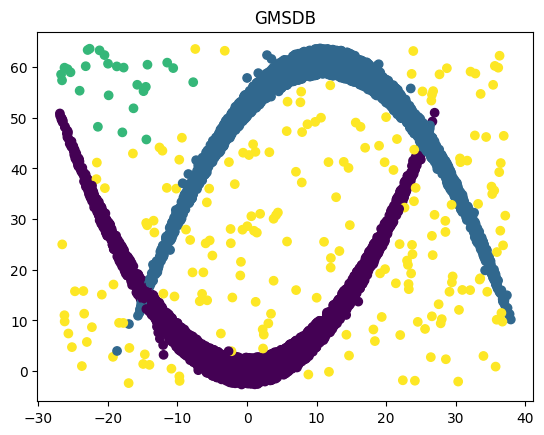

In [126]:
# GMSDB
from gmsdb import GMSDB
clf = GMSDB(n_components=20)
labels = clf.fit_predict(d)

print("GMSDB")
print(f"Количество найденных кластеров: {len(np.unique(labels))}")
plt.title("GMSDB")
plt.scatter(x0, x1, c = labels)
plt.show()

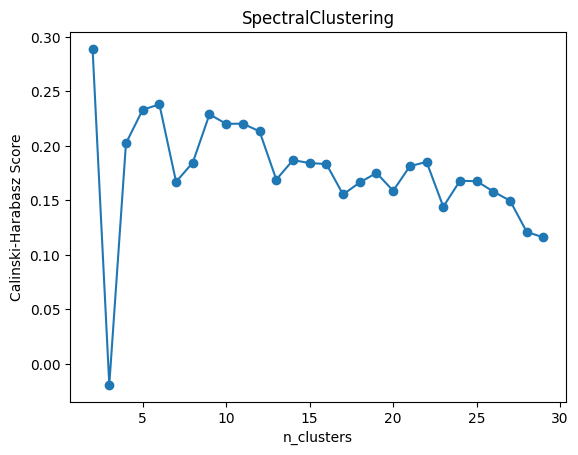

SpectralClustering: оптимальное число кластеров: 2
Лучший Calinski-Harabasz Score: 0.28890819340983076


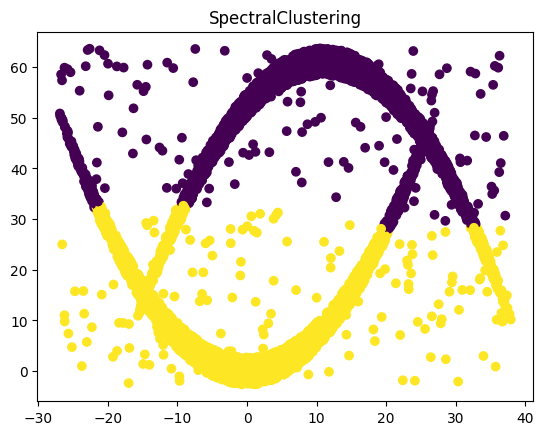

In [127]:
#SpectralClustering + silhoeuette score(cosine)
# Алгоритм очень долгий, и запускается дольше часа 
# Я проверил :(
# Для его оптимизации добавлю параметр affinity
from sklearn.cluster import SpectralClustering

ch_scores = []
best_score = -1
best_n = None
best_labels = None

for n in range(2, 30):
    clf = SpectralClustering(n_clusters=n, affinity="nearest_neighbors")
    labels = clf.fit_predict(d)
    score = silhouette_score(d, labels, metric = 'cosine')
    ch_scores.append(score)
    if score > best_score:
        best_score = score
        best_n = n
        best_labels = labels

plt.plot(range(2, 30), ch_scores, marker='o', linestyle='-')
plt.title("SpectralClustering")
plt.xlabel("n_clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.show()

print(f"SpectralClustering: оптимальное число кластеров: {best_n}")
print(f"Лучший Calinski-Harabasz Score: {best_score}")
plt.title("SpectralClustering")
plt.scatter(x0, x1, c=best_labels)
plt.show()